In [35]:
from qiskit import QuantumCircuit, execute, QuantumRegister
from qiskit import BasicAer
from qiskit.visualization import array_to_latex

In [31]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)
display(qc.draw())
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()
print(counts)


┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

{'1': 1024}


In [36]:
qc = QuantumCircuit(1,1)
# qc.x(0)
# qc.x(0)
qc.measure(0,0)
display(qc.draw())
backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
state = result.get_statevector()
print(state)
display(array_to_latex(state, prefix="\\text{Statevector} = "))

┌─┐
q_0: ┤M├
     └╥┘
c: 1/═╩═
      0

[1.+0.j 0.+0.j]


<IPython.core.display.Latex object>

In [47]:
q = QuantumRegister(2,'q')
qc = QuantumCircuit(q)
qc.cx(0,1)
backend_unitary = BasicAer.get_backend('unitary_simulator') 
result_unitary = execute(qc,backend_unitary).result().get_unitary(decimals=3)
print(result_unitary)
backend = BasicAer.get_backend('unitary_simulator')
result = execute(qc, backend).result()
unitary = result.get_unitary()
print(unitary)
display(array_to_latex(unitary, prefix="\\text{Statevector} = "))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


<IPython.core.display.Latex object>

In [48]:
qc = QuantumCircuit(1, 1)
qc.measure(0, 0)
backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
print(result.get_counts())

{'0': 1000}


In [49]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
result = execute(qc, backend, shots=1000).result()
print(result.get_counts())

{'0': 503, '1': 497}


In [50]:
qc = QuantumCircuit(2, 2)
qc.measure([0,1], [0,1])
result = execute(qc, backend, shots=1000).result()
print(result.get_counts())

{'00': 1000}


In [51]:
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.measure([0,1], [0,1])
result = execute(qc, backend, shots=1000).result()
print(result.get_counts())

{'10': 1000}


In [55]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.h(0)

qc.measure([0,1], [0,1])
result = execute(qc, backend, shots=1000).result()
print(result.get_counts())

{'00': 503, '01': 497}


In [58]:
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.x(1)
qc.measure(range(3), range(3))
result = execute(qc, backend, shots=1000).result()
print(result.get_counts())

{'010': 504, '011': 496}


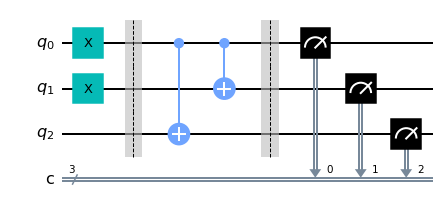

4

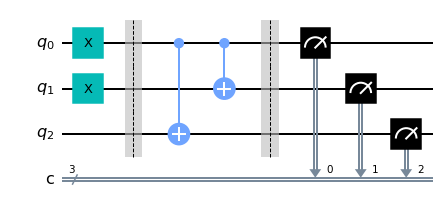

In [66]:
qc = QuantumCircuit(3, 3)
qc.x(0)
qc.x(1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,1)
qc.barrier()
qc.measure([0,1,2], [0,1,2])
display(qc.draw('mpl'))
display(qc.depth())